In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
#from sklearn import ensemble, tree, linear_model
import missingno as msno
import statistics as sts

In [2]:
dataset = pd.read_csv("SENSO_DATA_TABLE.csv", sep=",")
dataset.describe()

,2010,14,1400506,1402,14004,66010,6778,9739
count,27834.000000,27834.000000,2.783400e+04,27834.000000,27834.000000,2.783400e+04,2.783400e+04,27834.000000
mean,2012.000611,32.375153,3.253335e+06,3241.780700,32392.789789,8.689910e+05,3.524320e+04,15774.621937
std,1.414277,9.830374,9.845615e+05,983.288279,9831.435634,8.960926e+06,2.080519e+05,18989.018189
min,2010.000000,11.000000,1.100015e+06,1101.000000,11001.000000,-1.904600e+04,8.050000e+02,-1460.000000
25%,2011.000000,25.000000,2.512101e+06,2503.000000,25015.000000,5.192775e+04,5.312250e+03,6480.000000
50%,2012.000000,31.000000,3.146255e+06,3110.000000,31047.000000,1.141565e+05,1.119750e+04,11361.000000
75%,2013.000000,41.000000,4.119103e+06,4106.000000,41023.000000,3.056592e+05,2.407750e+04,19029.750000
max,2014.000000,53.000000,5.300108e+06,5301.000000,53001.000000,6.280649e+08,1.189589e+07,815094.000000


In [3]:
dataset.describe(exclude='number')

,Roraima,São João da Baliza,RM do Sul do Estado,Sul de Roraima,Sudeste de Roraima
count,27834,27834,6122,27834,27834
unique,27,5298,73,137,554
top,Minas Gerais,São Domingos,RM Belo Horizonte,Noroeste Rio-grandense,Ilhéus-Itabuna
freq,4265,25,250,1080,205


In [4]:
dataset.head()

,2010,14,Roraima,1400506,São João da Baliza,RM do Sul do Estado,1402,Sul de Roraima,14004,Sudeste de Roraima,66010,6778,9739
0,2010,14,Roraima,1400605,São Luiz,RM do Sul do Estado,1402,Sul de Roraima,14004,Sudeste de Roraima,59706,6750,8845
1,2010,14,Roraima,1400704,Uiramutã,NaN,1401,Norte de Roraima,14002,Nordeste de Roraima,55010,8147,6752
2,2010,15,Pará,1500107,Abaetetuba,NaN,1504,Nordeste Paraense,15011,Cametá,583793,141054,4139
3,2010,15,Pará,1500131,Abel Figueiredo,NaN,1506,Sudeste Paraense,15017,Paragominas,53599,6792,7891
4,2010,15,Pará,1500206,Acará,NaN,1504,Nordeste Paraense,15012,Tomé-Açu,440767,53605,8223


In [5]:
dataset.shape

(27834, 13)

In [6]:
dataset.columns = ["ano","cod_uf","nome_uf","cod_mun","nome_mun","regiao","cod_meso_reg","nome_meso_reg","cod_mic_reg","nome_min_reg","pib","populacao","pib_per_cap"]

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27834 entries, 0 to 27833
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ano            27834 non-null  int64 
 1   cod_uf         27834 non-null  int64 
 2   nome_uf        27834 non-null  object
 3   cod_mun        27834 non-null  int64 
 4   nome_mun       27834 non-null  object
 5   regiao         6122 non-null   object
 6   cod_meso_reg   27834 non-null  int64 
 7   nome_meso_reg  27834 non-null  object
 8   cod_mic_reg    27834 non-null  int64 
 9   nome_min_reg   27834 non-null  object
 10  pib            27834 non-null  int64 
 11  populacao      27834 non-null  int64 
 12  pib_per_cap    27834 non-null  int64 
dtypes: int64(8), object(5)
memory usage: 2.8+ MB


In [8]:
dataset.head()

,ano,cod_uf,nome_uf,cod_mun,nome_mun,regiao,cod_meso_reg,nome_meso_reg,cod_mic_reg,nome_min_reg,pib,populacao,pib_per_cap
0,2010,14,Roraima,1400605,São Luiz,RM do Sul do Estado,1402,Sul de Roraima,14004,Sudeste de Roraima,59706,6750,8845
1,2010,14,Roraima,1400704,Uiramutã,NaN,1401,Norte de Roraima,14002,Nordeste de Roraima,55010,8147,6752
2,2010,15,Pará,1500107,Abaetetuba,NaN,1504,Nordeste Paraense,15011,Cametá,583793,141054,4139
3,2010,15,Pará,1500131,Abel Figueiredo,NaN,1506,Sudeste Paraense,15017,Paragominas,53599,6792,7891
4,2010,15,Pará,1500206,Acará,NaN,1504,Nordeste Paraense,15012,Tomé-Açu,440767,53605,8223


In [9]:
dataset.sample(n=10)

,ano,cod_uf,nome_uf,cod_mun,nome_mun,regiao,cod_meso_reg,nome_meso_reg,cod_mic_reg,nome_min_reg,pib,populacao,pib_per_cap
23061,2014,27,Alagoas,2706604,Paulo Jacinto,RM do Vale do Paraíba,2702,Agreste Alagoano,27005,Palmeira dos Índios,45902,7683,5974
8108,2011,32,Espírito Santo,3204351,Rio Bananal,NaN,3202,Litoral Norte Espírito-santense,32006,Linhares,219595,17623,12461
19282,2013,24,Rio Grande do Norte,2408953,Rio do Fogo,NaN,2404,Leste Potiguar,24016,Litoral Nordeste,91656,10607,8641
5660,2011,17,Tocantins,1714203,Natividade,NaN,1702,Oriental do Tocantins,17008,Dianópolis,80042,9011,8883
7131,2011,27,Alagoas,2704401,Major Isidoro,RM de Palmeira dos Índios,2701,Sertão Alagoano,27004,Batalha,94079,18994,4953
8139,2011,33,Rio de Janeiro,3300803,Cachoeiras de Macacu,RM Rio de Janeiro,3306,Metropolitana do Rio de Janeiro,33016,Macacu-Caceribu,890326,54713,16273
14759,2012,35,São Paulo,3513306,Cruzália,NaN,3510,Assis,35039,Assis,48932,2224,22002
27381,2014,51,Mato Grosso,5106265,Novo Mundo,NaN,5101,Norte Mato-grossense,51003,Colíder,115679,8174,14152
13284,2012,29,Bahia,2907103,Carinhanha,NaN,2902,Vale São-Franciscano da Bahia,29007,Bom Jesus da Lapa,127244,28519,4462
24736,2013,42,Santa Catarina,4214706,Rio dos Cedros,RM Vale do Itajaí,4204,Vale do Itajaí,42012,Blumenau,219963,10879,20219


In [10]:
dataset.isnull().sum()

ano                  0
cod_uf               0
nome_uf              0
cod_mun              0
nome_mun             0
regiao           21712
cod_meso_reg         0
nome_meso_reg        0
cod_mic_reg          0
nome_min_reg         0
pib                  0
populacao            0
pib_per_cap          0
dtype: int64

In [11]:
dataset = dataset.drop('regiao', axis=1)
dataset.head()

,ano,cod_uf,nome_uf,cod_mun,nome_mun,cod_meso_reg,nome_meso_reg,cod_mic_reg,nome_min_reg,pib,populacao,pib_per_cap
0,2010,14,Roraima,1400605,São Luiz,1402,Sul de Roraima,14004,Sudeste de Roraima,59706,6750,8845
1,2010,14,Roraima,1400704,Uiramutã,1401,Norte de Roraima,14002,Nordeste de Roraima,55010,8147,6752
2,2010,15,Pará,1500107,Abaetetuba,1504,Nordeste Paraense,15011,Cametá,583793,141054,4139
3,2010,15,Pará,1500131,Abel Figueiredo,1506,Sudeste Paraense,15017,Paragominas,53599,6792,7891
4,2010,15,Pará,1500206,Acará,1504,Nordeste Paraense,15012,Tomé-Açu,440767,53605,8223


In [12]:
dataset.isnull().sum()

ano              0
cod_uf           0
nome_uf          0
cod_mun          0
nome_mun         0
cod_meso_reg     0
nome_meso_reg    0
cod_mic_reg      0
nome_min_reg     0
pib              0
populacao        0
pib_per_cap      0
dtype: int64

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27834 entries, 0 to 27833
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ano            27834 non-null  int64 
 1   cod_uf         27834 non-null  int64 
 2   nome_uf        27834 non-null  object
 3   cod_mun        27834 non-null  int64 
 4   nome_mun       27834 non-null  object
 5   cod_meso_reg   27834 non-null  int64 
 6   nome_meso_reg  27834 non-null  object
 7   cod_mic_reg    27834 non-null  int64 
 8   nome_min_reg   27834 non-null  object
 9   pib            27834 non-null  int64 
 10  populacao      27834 non-null  int64 
 11  pib_per_cap    27834 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 2.5+ MB


In [14]:
mediana = sts.median(dataset['pib_per_cap'])
mediana

11361.0

In [15]:
dataset['ano'].dtype

dtype('int64')

In [16]:
dataset.loc[(dataset['nome_uf'] ==  "Maranhão" )  & ( dataset['ano'] ==  2014) ].sample(n=5)

,ano,cod_uf,nome_uf,cod_mun,nome_mun,cod_meso_reg,nome_meso_reg,cod_mic_reg,nome_min_reg,pib,populacao,pib_per_cap
22994,2014,21,Maranhão,2111631,São Raimundo do Doca Bezerra,2103,Centro Maranhense,21010,Médio Mearim,33949,5387,6302
22435,2014,21,Maranhão,2101103,Axixá,2101,Norte Maranhense,21003,Rosário,59340,11780,5037
22723,2014,21,Maranhão,2106631,Matões do Norte,2101,Norte Maranhense,21006,Itapecuru Mirim,66988,15758,4251
22945,2014,21,Maranhão,2108504,Pindaré-Mirim,2102,Oeste Maranhense,21008,Pindaré,206070,32037,6432
22443,2014,21,Maranhão,2101707,Barreirinhas,2101,Norte Maranhense,21004,Lençóis Maranhenses,380737,59623,6386


In [17]:
dataset_num_df = dataset.select_dtypes(include=['number'])
dataset_num_df.columns

Index(['ano', 'cod_uf', 'cod_mun', 'cod_meso_reg', 'cod_mic_reg', 'pib',
       'populacao', 'pib_per_cap'],
      dtype='object')

In [18]:
dataset_cat_df = dataset.select_dtypes(include=['object'])
dataset_cat_df.columns

Index(['nome_uf', 'nome_mun', 'nome_meso_reg', 'nome_min_reg'], dtype='object')

In [19]:
agrupado_data = dataset.groupby(['ano']).size()
agrupado_data

ano
2010    5564
2011    5565
2012    5565
2013    5570
2014    5570
dtype: int64

In [20]:
agrupado = dataset.groupby(['nome_uf', 'ano']).size()
agrupado

nome_uf    ano 
Acre       2010     22
           2011     22
           2012     22
           2013     22
           2014     22
                  ... 
Tocantins  2010    139
           2011    139
           2012    139
           2013    139
           2014    139
Length: 135, dtype: int64

In [21]:
dataset['populacao'].describe()

count    2.783400e+04
mean     3.524320e+04
std      2.080519e+05
min      8.050000e+02
25%      5.312250e+03
50%      1.119750e+04
75%      2.407750e+04
max      1.189589e+07
Name: populacao, dtype: float64

In [22]:
dataset['pib'].describe()

count    2.783400e+04
mean     8.689910e+05
std      8.960926e+06
min     -1.904600e+04
25%      5.192775e+04
50%      1.141565e+05
75%      3.056592e+05
max      6.280649e+08
Name: pib, dtype: float64

In [23]:
dataset['pib_per_cap'].describe()

count     27834.000000
mean      15774.621937
std       18989.018189
min       -1460.000000
25%        6480.000000
50%       11361.000000
75%       19029.750000
max      815094.000000
Name: pib_per_cap, dtype: float64

In [24]:
dataset.loc[( dataset['pib'] <  0) ]

,ano,cod_uf,nome_uf,cod_mun,nome_mun,cod_meso_reg,nome_meso_reg,cod_mic_reg,nome_min_reg,pib,populacao,pib_per_cap
14313,2012,24,Rio Grande do Norte,2404507,Guamaré,2402,Central Potiguar,24008,Macau,-19046,13047,-1460


In [25]:
dataset.isnull().sum()

ano              0
cod_uf           0
nome_uf          0
cod_mun          0
nome_mun         0
cod_meso_reg     0
nome_meso_reg    0
cod_mic_reg      0
nome_min_reg     0
pib              0
populacao        0
pib_per_cap      0
dtype: int64

In [26]:
# Soma do PIB de todas as cidades de cada estado para cada ano.
pib_estado = dataset.groupby(['nome_uf', 'ano'])['pib'].sum().reset_index()
pib_estado.sample(n=10)


,nome_uf,ano,pib
130,Tocantins,2010,16404814
2,Acre,2012,10137925
55,Mato Grosso do Sul,2010,47270652
26,Ceará,2011,89695826
78,Pará,2013,121224851
122,Sergipe,2012,32853181
15,Amazonas,2010,60877125
50,Mato Grosso,2010,56600957
103,Rio de Janeiro,2013,628226073
63,Minas Gerais,2013,488004902


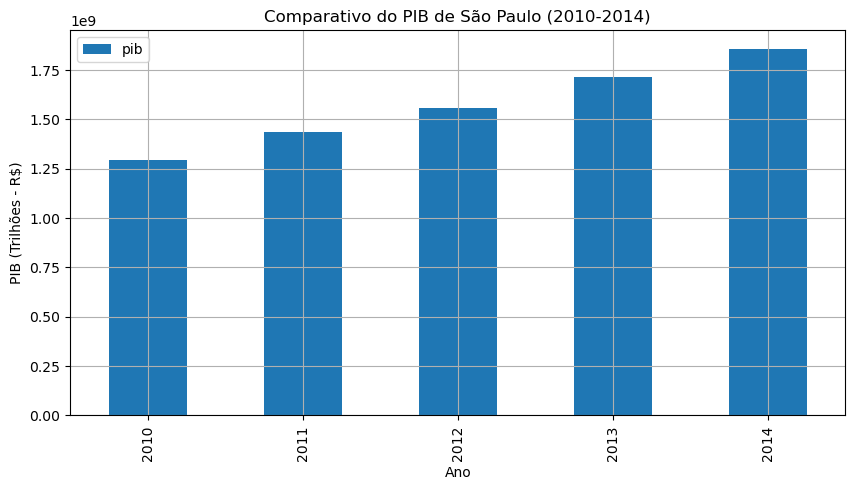

In [27]:
estado_alvo = 'São Paulo'

df_estado = pib_estado[pib_estado['nome_uf'] == estado_alvo]

# Plotar o gráfico comparativo do PIB ao longo dos anos
fig, ax = plt.subplots(figsize=(10, 5))
df_estado.plot(x='ano', y='pib', kind='bar', ax=ax)
plt.title(f'Comparativo do PIB de {estado_alvo} (2010-2014)')
plt.xlabel('Ano')
plt.ylabel('PIB (Trilhões - R$)')
plt.grid(True)
plt.show()

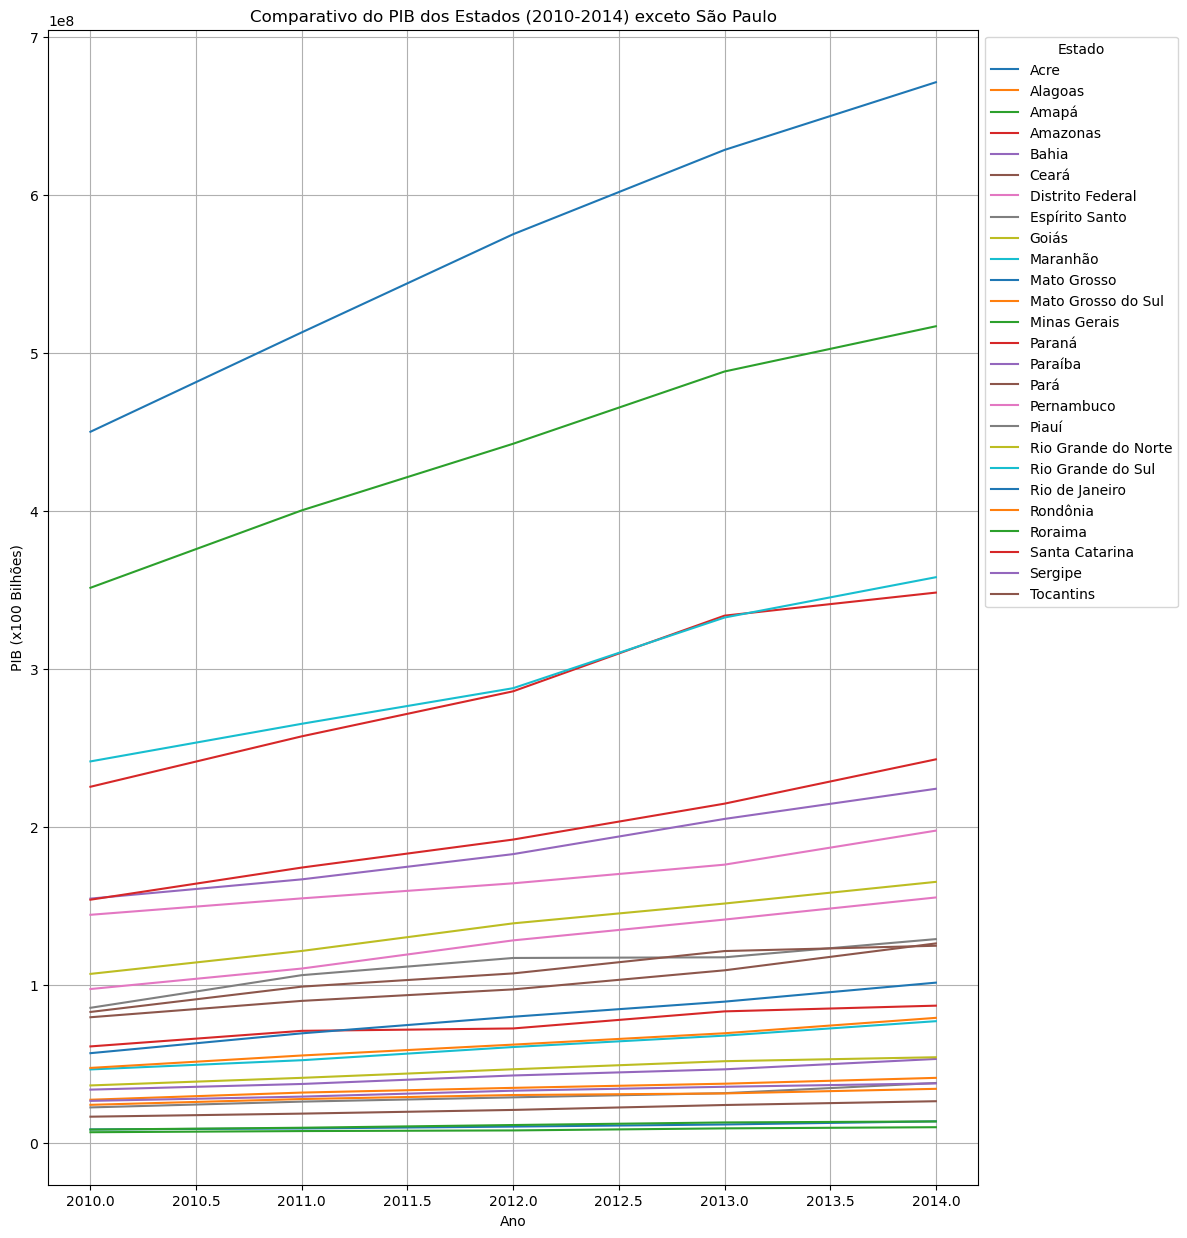

In [28]:
df = pib_estado[['nome_uf', 'ano', 'pib']].drop(df_estado[df_estado['nome_uf'] == 'São Paulo'].index)

# Gráfico de linha comparativo para cada estado
fig, ax = plt.subplots(figsize=(12, 15))
for estado, dados_estado in df.groupby('nome_uf'):
    dados_estado.plot(x='ano', y='pib', kind='line', label=estado, ax=ax)

# Configurar o gráfico
plt.title('Comparativo do PIB dos Estados (2010-2014) exceto São Paulo')
plt.xlabel('Ano')
plt.ylabel('PIB (x100 Bilhões)')
plt.grid(True)
plt.legend(title='Estado', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [30]:
caminho_do_arquivo = '/home/will/Documentos/Dev/DevOther/DataAnalytics/IBGE/dataset_IBGE_limpo.csv'

In [31]:
dataset.to_csv(caminho_do_arquivo, index=False)